In [85]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

In [86]:
import numpy as np
import pandas as pd
import sqlite3
import datetime as dt
from datetime import timedelta

### Connect to the Hawaii Database

In [87]:
#connect
conn = sqlite3.connect("Resources/hawaii.sqlite")

In [88]:
#obtain a cursor - something to loop through via database connection
cur = conn.cursor()

In [89]:
cur.execute("SELECT name FROM sqlite_master WHERE type='table'")
#obtain data from cursor via loop - in this case - table names in database file
rows = cur.fetchall()
 
for row in rows:
    print(row)

('measurement',)
('station',)


In [90]:
#obtain details of the schema/table format from table named measurement
cur.execute("SELECT sql FROM sqlite_master WHERE name='measurement'")
rows = cur.fetchall()
 
for row in rows:
    print(row)

('CREATE TABLE measurement (\n\tid INTEGER NOT NULL, \n\tstation TEXT, \n\tdate TEXT, \n\tprcp FLOAT, \n\ttobs FLOAT, \n\tPRIMARY KEY (id)\n)',)


In [91]:
#obtain details of the schema/table format from table named station
cur.execute("SELECT sql FROM sqlite_master WHERE name='station'")
rows = cur.fetchall()
 
for row in rows:
    print(row)

('CREATE TABLE station (\n\tid INTEGER NOT NULL, \n\tstation TEXT, \n\tname TEXT, \n\tlatitude FLOAT, \n\tlongitude FLOAT, \n\televation FLOAT, \n\tPRIMARY KEY (id)\n)',)


### Review the Data in the Measurement and Station tables

In [92]:
#view the list of columns in the measurement table
cur.execute("PRAGMA table_info(measurement)")
rows =  cur.fetchall()

for row in rows:
    print(row)

(0, 'id', 'INTEGER', 1, None, 1)
(1, 'station', 'TEXT', 0, None, 0)
(2, 'date', 'TEXT', 0, None, 0)
(3, 'prcp', 'FLOAT', 0, None, 0)
(4, 'tobs', 'FLOAT', 0, None, 0)


In [93]:
#view
#cur.execute("SELECT * from measurement limit 10")
cur.execute("SELECT * from measurement where station ='USC00513117' limit 10")
rows = cur.fetchall()
 
for row in rows:
    print(row)

(2725, 'USC00513117', '2010-01-01', 0.28, 67.0)
(2726, 'USC00513117', '2010-01-02', 0.0, 65.0)
(2727, 'USC00513117', '2010-01-03', 0.0, 75.0)
(2728, 'USC00513117', '2010-01-04', 0.0, 76.0)
(2729, 'USC00513117', '2010-01-05', 0.0, 76.0)
(2730, 'USC00513117', '2010-01-06', 0.02, 76.0)
(2731, 'USC00513117', '2010-01-07', 0.38, 70.0)
(2732, 'USC00513117', '2010-01-08', 0.01, 66.0)
(2733, 'USC00513117', '2010-01-09', 0.0, 69.0)
(2734, 'USC00513117', '2010-01-10', 0.0, 74.0)


In [94]:
#view the list of columns in the station table
cur.execute("PRAGMA table_info(station)")
rows =  cur.fetchall()

for row in rows:
    print(row)

(0, 'id', 'INTEGER', 1, None, 1)
(1, 'station', 'TEXT', 0, None, 0)
(2, 'name', 'TEXT', 0, None, 0)
(3, 'latitude', 'FLOAT', 0, None, 0)
(4, 'longitude', 'FLOAT', 0, None, 0)
(5, 'elevation', 'FLOAT', 0, None, 0)


In [95]:
#view
cur.execute("SELECT * from station limit 10")
rows = cur.fetchall()
 
for row in rows:
    print(row)

(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
(2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)
(3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)
(4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)
(5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)
(6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)
(7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9)
(8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9)
(9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)


In [96]:
#view total records
cur.execute("SELECT count(*) from measurement")
rows = cur.fetchall()
 
for row in rows:
    print(row)
    
#  measurement has 19,500 records
# station has 9 records

(19550,)


In [97]:
#view total records
cur.execute("SELECT count(*) from station")
rows = cur.fetchall()
 
for row in rows:
    print(row)
    
#  measurement has 19,500 records
# station has 9 records

(9,)


In [98]:
#view distinct station names in measurement
cur.execute("SELECT distinct(station) as stationNamestationID from measurement")
rows = cur.fetchall()
 
for row in rows:
    print(row)

('USC00519397',)
('USC00513117',)
('USC00514830',)
('USC00517948',)
('USC00518838',)
('USC00519523',)
('USC00519281',)
('USC00511918',)
('USC00516128',)


## Step 1
### Section A - Precipitation Analysis
<BR>A1:  Design a query to retrieve the last 12 months of precipitation data.
<BR>A2:  Select only the date and prcp values.
<BR>A3:  Load the query results into a Pandas DataFrame and set the index to the date column.
<BR>A4:   Sort the DataFrame values by date.
<BR>A5:  Plot the results using the DataFrame plot method.
<BR>A6:  Use Pandas to print the summary statistics for the precipitation data.

In [99]:
#find the latest date in measurement

cur.execute("SELECT max(date) as maxDate from measurement")
rows = cur.fetchall()
 
for row in rows:
    maxDate = row[0]  # without this, the variable will NOT be saved for later use
    print(row)
    
#returns 2017-08-23

('2017-08-23',)


In [100]:
print(maxDate)

2017-08-23


In [101]:
type(maxDate)

str

In [102]:
print("maxDate type: "+ str(type(maxDate)))

maxDate type: <class 'str'>


In [103]:
#convert to a string
maxDate_s = str(maxDate)

In [104]:
type(maxDate_s)

str

In [105]:
print("maxDate type: "+ str(type(maxDate_s)))


maxDate type: <class 'str'>


In [106]:
maxDate = dt.datetime.strptime(maxDate, '%Y-%m-%d')
prev_year = maxDate - dt.timedelta(days=365)
prev_year

datetime.datetime(2016, 8, 23, 0, 0)

In [107]:
print(prev_year)

2016-08-23 00:00:00


In [108]:
# need to convert the prev_year to a string
prevYear_s = str(prev_year)

In [109]:
type(prevYear_s)

str

In [110]:
cur.execute("SELECT * from measurement order by date desc limit 20")
rows = cur.fetchall()
 
for row in rows:
    print(row)

(2724, 'USC00519397', '2017-08-23', 0.0, 81.0)
(7635, 'USC00514830', '2017-08-23', 0.0, 82.0)
(12187, 'USC00519523', '2017-08-23', 0.08, 82.0)
(19550, 'USC00516128', '2017-08-23', 0.45, 76.0)
(2723, 'USC00519397', '2017-08-22', 0.0, 82.0)
(12186, 'USC00519523', '2017-08-22', 0.0, 82.0)
(19549, 'USC00516128', '2017-08-22', 0.5, 76.0)
(2722, 'USC00519397', '2017-08-21', 0.0, 81.0)
(7634, 'USC00514830', '2017-08-21', 0.02, 79.0)
(12185, 'USC00519523', '2017-08-21', None, 82.0)
(19548, 'USC00516128', '2017-08-21', 0.56, 76.0)
(2721, 'USC00519397', '2017-08-20', 0.0, 81.0)
(7633, 'USC00514830', '2017-08-20', 0.01, 80.0)
(19547, 'USC00516128', '2017-08-20', None, 78.0)
(2720, 'USC00519397', '2017-08-19', 0.0, 79.0)
(7632, 'USC00514830', '2017-08-19', 0.0, 80.0)
(12184, 'USC00519523', '2017-08-19', None, 85.0)
(19546, 'USC00516128', '2017-08-19', 0.09, 71.0)
(2719, 'USC00519397', '2017-08-18', 0.0, 80.0)
(7631, 'USC00514830', '2017-08-18', 0.0, 77.0)


In [111]:
startDate = dt.datetime(2017, 8, 19, 0, 0)
endDate = dt.datetime(2017, 8, 22, 0, 0)

In [112]:
print("The startDate is " + str(startDate) + "and the endDate is " + str(endDate))

The startDate is 2017-08-19 00:00:00and the endDate is 2017-08-22 00:00:00


In [113]:
#convert the startDate to a string
startS = str(startDate)

In [114]:
type(startS)

str

In [115]:
endS = str(endDate)

In [116]:
type(startDate)

datetime.datetime

In [117]:
#before answering the question, determine if simple variables work
#create startDate and endDate to test output
#The startDate is 2017-08-19 00:00:00and the endDate is 2017-08-22 00:00:00

#The first two work.  All others are things I tried.  See section C where these queries are executed

#VS Code for start date only
#cur.execute("SELECT * from measurement where Date(date) >= Date('" + str(startS) + "')") 


#VS Code for two dates
#cur.execute("SELECT min(tobs), max(tobs), avg(tobs) from measurement where Date(date) >= Date('" + str(startS) + "') and Date(date) <= Date('" + str(endS) + "')")

################# none of these work ##########################33
# cur.execute("SELECT * from measurement where date >= '2017-08-19'")  #works!  must use a date format  now try with variable
#cur.execute("SELECT * from measurement where date >= '2017-08-19' and date <='2017-08-22'")  #works!  must use a date format  now try with variable

#cur.execute("SELECT * from measurement where date >= 2017-08-19")   does not work - returns 2010
#cur.execute("SELECT * from measurement where strftime('%s', date) >= strftime('%s', startDate)")   #no
#cur.execute("SELECT * from measurement where date >= strftime('%s', 'startDate')")  #no error, no results
#cur.execute("SELECT * from measurement where date >= strftime('startDate')")   #no error, no results
#cur.execute("SELECT * from measurement where date >= %s" % (startDate.strftime('%m-%d-%Y'),))  #does not work, returns 2010
#cur.execute("SELECT * from measurement where date >= Datetime('startDate')")  #no error, no results
#cur.execute("SELECT * FROM measurement WHERE strftime('%s', date) BETWEEN strftime('%s', 'startDate') AND strftime('%s', 'endDate')")  #no error, no results
#cur.execute("SELECT * FROM measurement WHERE Datetime('%s', date) BETWEEN Datetime('%s', 'startDate') AND Datetime('%s', 'endDate')") #no error, no results

#cur.execute("SELECT * FROM measurement WHERE CAST(strftime('%s', date) AS  integer) >=CAST(strftime('%s', 'startDate')  AS  integer)")   #no error, no results
#cur.execute("SELECT * FROM measurement WHERE date >= strftime('%m/%d/%Y %H:%M', datetime('startDate'))")   #no error, no results

#cur.execute("SELECT * from measurement where date >= 'startS'")   #no error, no results
#cur.execute("SELECT * from measurement where strftime('%s', date) >= 'startS'")  #no error, no results
#cur.execute("SELECT * from measurement where date >= strftime('%s', 'startS')")  #no error, no results
#cur.execute("SELECT * from measurement where date >= strftime('startS')")   #no error, no results
#cur.execute("SELECT * from measurement where date >= %s" % ('startS'.strftime('%m-%d-%Y'),))  #error
#cur.execute("SELECT * from measurement where date >= Datetime('startS')")  #no error, no results
#cur.execute("SELECT * FROM measurement WHERE CAST(strftime('%s', date) AS  integer) >=CAST(strftime('%s', 'startS')  AS  integer)")   #no error, no results
#cur.execute("SELECT * FROM measurement WHERE date >= strftime('%m/%d/%Y %H:%M', datetime('startS'))")   #no error, no results

rows = cur.fetchall()

for row in rows:
    print(row)

In [118]:
#  A1:  Design a query to retrieve the last 12 months of precipitation data.
#  A2:  Select only the date and prcp values.

#NOTE:    last date in measurement is 2017-08-23
#use this if the data were current:
#cur.execute("SELECT * from measurement where date >= date( julianday(date('now'))-365);")

#cur.execute("SELECT date, prcp from measurement where date >= '2016-08-23'")
cur.execute("SELECT date, prcp from measurement where date >= Date('" + str(prevYear_s) + "')")

rows = cur.fetchall()
 
for row in rows:
    print(row)
    

('2016-08-23', 0.0)
('2016-08-24', 0.08)
('2016-08-25', 0.08)
('2016-08-26', 0.0)
('2016-08-27', 0.0)
('2016-08-28', 0.01)
('2016-08-29', 0.0)
('2016-08-30', 0.0)
('2016-08-31', 0.13)
('2016-09-01', 0.0)
('2016-09-02', 0.0)
('2016-09-03', 0.0)
('2016-09-04', 0.03)
('2016-09-05', None)
('2016-09-06', None)
('2016-09-07', 0.05)
('2016-09-08', 0.0)
('2016-09-09', 0.03)
('2016-09-10', 0.0)
('2016-09-11', 0.05)
('2016-09-12', 0.0)
('2016-09-13', 0.02)
('2016-09-14', 1.32)
('2016-09-15', 0.42)
('2016-09-16', 0.06)
('2016-09-17', 0.05)
('2016-09-18', 0.0)
('2016-09-19', 0.0)
('2016-09-20', 0.0)
('2016-09-21', 0.0)
('2016-09-22', 0.02)
('2016-09-23', 0.0)
('2016-09-24', 0.0)
('2016-09-25', 0.0)
('2016-09-26', 0.06)
('2016-09-27', 0.02)
('2016-09-28', 0.0)
('2016-09-29', 0.0)
('2016-09-30', 0.0)
('2016-10-01', 0.0)
('2016-10-02', 0.0)
('2016-10-03', 0.0)
('2016-10-04', 0.0)
('2016-10-05', 0.0)
('2016-10-06', 0.0)
('2016-10-07', 0.0)
('2016-10-08', 0.0)
('2016-10-09', 0.0)
('2016-10-10', 0.0)
('

In [119]:
#A3:  Load the query results into a Pandas DataFrame and set the index to the date column.  (Index set in upcoming step)
#A4:   Sort the DataFrame values by date.
lastYear = pd.read_sql("SELECT date, prcp from measurement where date >= '2016-08-24' order by date desc, prcp asc", conn)

In [120]:
lastYear.head(10)

,date,prcp
0,2017-08-23,0.00
1,2017-08-23,0.00
2,2017-08-23,0.08
3,2017-08-23,0.45
4,2017-08-22,0.00
5,2017-08-22,0.00
6,2017-08-22,0.50
7,2017-08-21,NaN
8,2017-08-21,0.00
9,2017-08-21,0.02


In [121]:
#A3:  .... set the index to the date column. 
#saved as a new df in case I need lastYear where the index was not changed.
lastYear2 = lastYear.set_index('date')

In [122]:
#manual check
lastYear2.head()

,prcp
date,
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-23,0.45
2017-08-22,0.00


Text(0, 0.5, 'Precipitation (inches)')

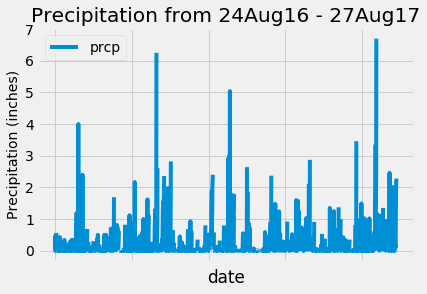

In [123]:
#  A5:  Plot the results using the DataFrame plot method.
lastYear2.plot()
plt.title("Precipitation from 24Aug16 - 27Aug17")
plt.ylabel('Precipitation (inches)', fontsize=14)

In [124]:
#A5:  EXTRA.  Create the graph using plot (opposed to the dataframe plot function)

In [125]:
# Create an array that contains the number of users each language has
precip = lastYear["prcp"]
#x_axis = np.arange(len(precip))
x_axis = lastYear["date"]

Text(0, 0.5, 'Precipitation (inches)')

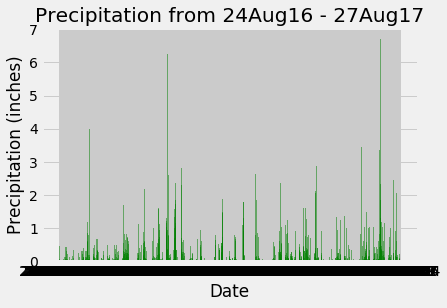

In [126]:
# Tell matplotlib that we will be making a bar chart
# Users is our y axis and x_axis is, of course, our x axis
# We apply align="edge" to ensure our bars line up with our tick marks
plt.bar(x_axis, precip, color='g', alpha=0.5, align="center")

# Give our chart some labels and a tile
plt.title("Precipitation from 24Aug16 - 27Aug17")
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")

In [127]:
#A6:  Use Pandas to print the summary statistics for the precipitation data.
# starter notebook shows results in a dataframe
summary = pd.DataFrame(lastYear2["prcp"].describe())

In [128]:
summary.head()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000


## Step 1
### Section B:   Station Analysis
B1 - Design a query to calculate the total number of stations.
<BR>
B2- Design a query to find the most active stations.
<BR>
-- B2a:  List the stations and observation counts in descending order.
<BR>
--  B2b:   Which station has the highest number of observations?
<BR>Hint: You may need to use functions such as func.min, func.max, func.avg, and func.count in your queries.

<BR>
B3.  Design a query to retrieve the last 12 months of temperature observation data (tobs).
<BR>
--  B3a.  Filter by the station with the highest number of observations.
--  B3b.   Plot the results as a histogram with bins=12.

In [129]:
#B1.   Design a query to calculate the total number of stations.
cur.execute("SELECT count(distinct(station)) FROM station")
rows = cur.fetchall()
 
for row in rows:
    print(row)

(9,)


In [130]:
#view all records, manual check
cur.execute("SELECT * FROM measurement")
rows = cur.fetchall()
 
for row in rows:
    print(row)

(1, 'USC00519397', '2010-01-01', 0.08, 65.0)
(2, 'USC00519397', '2010-01-02', 0.0, 63.0)
(3, 'USC00519397', '2010-01-03', 0.0, 74.0)
(4, 'USC00519397', '2010-01-04', 0.0, 76.0)
(5, 'USC00519397', '2010-01-06', None, 73.0)
(6, 'USC00519397', '2010-01-07', 0.06, 70.0)
(7, 'USC00519397', '2010-01-08', 0.0, 64.0)
(8, 'USC00519397', '2010-01-09', 0.0, 68.0)
(9, 'USC00519397', '2010-01-10', 0.0, 73.0)
(10, 'USC00519397', '2010-01-11', 0.01, 64.0)
(11, 'USC00519397', '2010-01-12', 0.0, 61.0)
(12, 'USC00519397', '2010-01-14', 0.0, 66.0)
(13, 'USC00519397', '2010-01-15', 0.0, 65.0)
(14, 'USC00519397', '2010-01-16', 0.0, 68.0)
(15, 'USC00519397', '2010-01-17', 0.0, 64.0)
(16, 'USC00519397', '2010-01-18', 0.0, 72.0)
(17, 'USC00519397', '2010-01-19', 0.0, 66.0)
(18, 'USC00519397', '2010-01-20', 0.0, 66.0)
(19, 'USC00519397', '2010-01-21', 0.0, 69.0)
(20, 'USC00519397', '2010-01-22', 0.0, 67.0)
(21, 'USC00519397', '2010-01-23', 0.0, 67.0)
(22, 'USC00519397', '2010-01-24', 0.01, 71.0)
(23, 'USC00519

In [131]:
#B2:   What are the most active stations? (i.e. what stations have the most rows)?
#B2a: List the stations and observation counts in descending order. 

cur.execute("SELECT s.station, s.name, count(m.station) from station as s inner join measurement as m on s.station = m.station group by s.station order by count(m.station) desc")
rows = cur.fetchall()
 
for row in rows:
    print(row)


('USC00519281', 'WAIHEE 837.5, HI US', 2772)
('USC00519397', 'WAIKIKI 717.2, HI US', 2724)
('USC00513117', 'KANEOHE 838.1, HI US', 2709)
('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2669)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2612)
('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202)
('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1979)
('USC00517948', 'PEARL CITY, HI US', 1372)
('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 511)


In [132]:
#For easier viewing, create a dataframe
stationActive = pd.read_sql("SELECT s.station as stationID, s.name as stationName, count(m.station) as activityCount from station as s inner join measurement as m on s.station = m.station group by s.station order by count(m.station) desc", conn)
stationActive.head(10)

,stationID,stationName,activityCount
0,USC00519281,"WAIHEE 837.5, HI US",2772
1,USC00519397,"WAIKIKI 717.2, HI US",2724
2,USC00513117,"KANEOHE 838.1, HI US",2709
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",2669
4,USC00516128,"MANOA LYON ARBO 785.2, HI US",2612
5,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",2202
6,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",1979
7,USC00517948,"PEARL CITY, HI US",1372
8,USC00518838,"UPPER WAHIAWA 874.3, HI US",511


In [133]:
#B2b: Which station has the highest number of observations? 
#EXAMPLE 1:  same as query in B2a, but limit results to 1

cur.execute("SELECT s.station, s.name, count(m.station) from station as s inner join measurement as m on s.station = m.station group by s.station order by count(m.station) desc limit 1")
rows = cur.fetchall()
 
for row in rows:
    print(row)


('USC00519281', 'WAIHEE 837.5, HI US', 2772)


In [134]:
stationActive.columns

Index(['stationID', 'stationName', 'activityCount'], dtype='object')

In [135]:
#B2b: Which station has the highest number of observations? 
#EXAMPLE 2:  pandas - since table is sorted in descending order, choose index 0.
#This is the station with the highest obs

highObs = stationActive.iloc[0]['stationID']
print(highObs)

USC00519281


In [136]:
#B2b: Which station has the highest number of observations? 
#EXAMPLE 3:  use max function in a SQL Statement
#note, can do this with pandas df.   Not sure how to do it in a SQL query using max function.

#https://stackoverflow.com/questions/25977977/sqlite-aggregate-maxsum-error-in-android
# https://stackoverflow.com/questions/9244378/how-to-maxcountx-in-sqlite
# ??  not able to make this work using the max function on an aggregate of sum


In [137]:
#manual check.  find the most recent date
cur.execute("select max(date) as maxDate from measurement")
rows = cur.fetchall()
 
for row in rows:
    print(row)

('2017-08-23',)


In [138]:
#Self Tutorial - 
#how to add/subtract dates to a date using sqlite
cur.execute("SELECT date('now','-10 day')")
rows = cur.fetchall()
 
for row in rows:
    print(row)

('2019-04-25',)


In [139]:
# cur.execute("SELECT date, tobs from measurement where date >= ((select max(date) from measurement), '-365 day')")
# Jing offered sqlalchemy has a solution for subtracting from the date
#???  how do I subtract 365 days from the max(date)??
cur.execute("SELECT date, tobs from measurement where date >= (select max(date) from measurement as maxDate)")
rows = cur.fetchall()
 
for row in rows:
    print(row)

('2017-08-23', 81.0)
('2017-08-23', 82.0)
('2017-08-23', 82.0)
('2017-08-23', 76.0)


In [140]:
print(maxDate)

2017-08-23 00:00:00


In [141]:
# B3.  Design a query to retrieve the last 12 months of temperature observation data (tobs).
#NOTE:    last date in measurement is 2017-08-23
#use this if the data were current:
# cur.execute("SELECT * from measurement where date >= date( julianday(date('now'))-365);")


cur.execute("SELECT date, tobs from measurement where Date(date) >= Date('" + str(prevYear_s) + "')") 
#cur.execute("SELECT min(tobs), max(tobs), avg(tobs) from measurement where date >= '2016-08-24'")
rows = cur.fetchall()
 
for row in rows:
    print(row)

('2016-08-23', 81.0)
('2016-08-24', 79.0)
('2016-08-25', 80.0)
('2016-08-26', 79.0)
('2016-08-27', 77.0)
('2016-08-28', 78.0)
('2016-08-29', 78.0)
('2016-08-30', 79.0)
('2016-08-31', 80.0)
('2016-09-01', 81.0)
('2016-09-02', 80.0)
('2016-09-03', 79.0)
('2016-09-04', 75.0)
('2016-09-05', 79.0)
('2016-09-06', 76.0)
('2016-09-07', 76.0)
('2016-09-08', 80.0)
('2016-09-09', 79.0)
('2016-09-10', 78.0)
('2016-09-11', 76.0)
('2016-09-12', 78.0)
('2016-09-13', 78.0)
('2016-09-14', 75.0)
('2016-09-15', 79.0)
('2016-09-16', 80.0)
('2016-09-17', 79.0)
('2016-09-18', 81.0)
('2016-09-19', 77.0)
('2016-09-20', 77.0)
('2016-09-21', 78.0)
('2016-09-22', 76.0)
('2016-09-23', 82.0)
('2016-09-24', 81.0)
('2016-09-25', 78.0)
('2016-09-26', 80.0)
('2016-09-27', 80.0)
('2016-09-28', 79.0)
('2016-09-29', 80.0)
('2016-09-30', 80.0)
('2016-10-01', 80.0)
('2016-10-02', 79.0)
('2016-10-03', 79.0)
('2016-10-04', 79.0)
('2016-10-05', 80.0)
('2016-10-06', 80.0)
('2016-10-07', 79.0)
('2016-10-08', 78.0)
('2016-10-09'

In [142]:
#add to a dataframe for ease of work
tempObs = pd.read_sql("SELECT id, station, date, tobs from measurement where date >= Date('" + str(prevYear_s) + "')", conn)
tempObs.head(10)


,id,station,date,tobs
0,2364,USC00519397,2016-08-23,81.0
1,2365,USC00519397,2016-08-24,79.0
2,2366,USC00519397,2016-08-25,80.0
3,2367,USC00519397,2016-08-26,79.0
4,2368,USC00519397,2016-08-27,77.0
5,2369,USC00519397,2016-08-28,78.0
6,2370,USC00519397,2016-08-29,78.0
7,2371,USC00519397,2016-08-30,79.0
8,2372,USC00519397,2016-08-31,80.0
9,2373,USC00519397,2016-09-01,81.0


In [143]:
#B3a.  Filter by the station with the highest number of observations.
#Use pandas
tempObs2 = tempObs[tempObs['station']==highObs]
tempObs2.head()


,id,station,date,tobs
1529,14608,USC00519281,2016-08-23,77.0
1530,14609,USC00519281,2016-08-24,77.0
1531,14610,USC00519281,2016-08-25,80.0
1532,14611,USC00519281,2016-08-26,80.0
1533,14612,USC00519281,2016-08-27,75.0


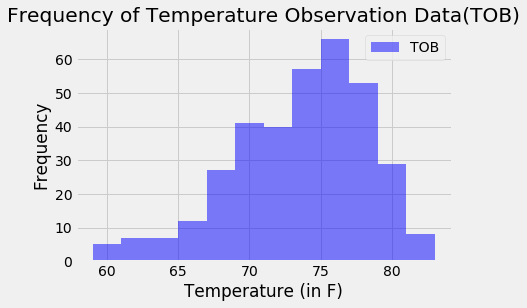

In [144]:
#B3b.   Plot the results as a histogram with bins=12.
#NOTE:  added an additional import: import matplotlib.mlab as mlab

#create histogram
x = tempObs2['tobs']
num_bins = 12
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5, label = 'TOB')

#add labels
plt.xlabel('Temperature (in F)')
plt.ylabel('Frequency')
plt.title('Frequency of Temperature Observation Data(TOB)')

plt.legend(loc='upper right')
plt.show()



### End Step 1
(there is no step 2)
### Begin Step 3

## Step 3 - Routes


3A.  Home page.
<BR>List all routes that are available.

<BR>3B.  /api/v1.0/precipitation
<BR>Convert the query results to a Dictionary using date as the key and prcp as the value.
<BR>Return the JSON representation of your dictionary.




<BR>3C.  /api/v1.0/stations
<BR>Return a JSON list of stations from the dataset.

<BR>3D.   /api/v1.0/tobs
<BR>query for the dates and temperature observations from a year from the last data point.
<BR>Return a JSON list of Temperature Observations (tobs) for the previous year.

<BR>3E.   /api/v1.0/<start> and /api/v1.0/<start>/<end>
<BR>Return a JSON list of the minimum temperature, the average temperature, and the max temperature for a given start or start-end range.
<BR>3E1.  When given the start only, calculate TMIN, TAVG, and TMAX for all dates greater than and equal to the start date.
<BR>3E2.  When given the start and the end date, calculate the TMIN, TAVG, and TMAX for dates between the start and end date inclusive.

In [145]:
#  3A. Home page. 
#  List all routes that are available.

#@app.route("/")
#see appFinal.py

In [146]:
# 3B. 
# Convert the query results to a Dictionary using date as the key and prcp as the value. 
# Return the JSON representation of your dictionary.

#@app.route("/api/v1.0/precipitation")
#see appFinal.py

In [147]:
# 3C. /api/v1.0/stations 
# Return a JSON list of stations from the dataset.

#Practice - return all station data
#@app.route("/api/v1.0/station_all")
cur.execute("SELECT * from station")
rows = cur.fetchall()
 
for row in rows:
    print(row)   

(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
(2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)
(3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)
(4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)
(5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)
(6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)
(7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9)
(8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9)
(9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)


In [148]:
#return only the station ID
#@app.route("/api/v1.0/station_id")

cur.execute("SELECT station from station")

rows = cur.fetchall()
 
for row in rows:
    print(row)   

('USC00519397',)
('USC00513117',)
('USC00514830',)
('USC00517948',)
('USC00518838',)
('USC00519523',)
('USC00519281',)
('USC00511918',)
('USC00516128',)


In [149]:
#return the station names
#@app.route("/api/v1.0/station_name")

cur.execute("SELECT name from station")

rows = cur.fetchall()
 
for row in rows:
    print(row)   

('WAIKIKI 717.2, HI US',)
('KANEOHE 838.1, HI US',)
('KUALOA RANCH HEADQUARTERS 886.9, HI US',)
('PEARL CITY, HI US',)
('UPPER WAHIAWA 874.3, HI US',)
('WAIMANALO EXPERIMENTAL FARM, HI US',)
('WAIHEE 837.5, HI US',)
('HONOLULU OBSERVATORY 702.2, HI US',)
('MANOA LYON ARBO 785.2, HI US',)


In [150]:
print("maxDate= "+ maxDate_s + " and prevYear_s= " + prevYear_s)

maxDate= 2017-08-23 and prevYear_s= 2016-08-23 00:00:00


In [151]:
type(maxDate_s)

str

In [152]:
# 3D. /api/v1.0/tobs 
# query for the dates and temperature observations from a year from the last data point. 
# Return a JSON list of Temperature Observations (tobs) for the previous year.


#@app.route("/api/v1.0/tobs")

cur.execute("SELECT tobs from measurement where Date(date) >= Date('" +str(prevYear_s) +"') order by date desc") 

rows = cur.fetchall()
 
for row in rows:
    print(row)  

(81.0,)
(82.0,)
(82.0,)
(76.0,)
(82.0,)
(82.0,)
(76.0,)
(81.0,)
(79.0,)
(82.0,)
(76.0,)
(81.0,)
(80.0,)
(78.0,)
(79.0,)
(80.0,)
(85.0,)
(71.0,)
(80.0,)
(77.0,)
(79.0,)
(76.0,)
(78.0,)
(83.0,)
(76.0,)
(72.0,)
(82.0,)
(79.0,)
(76.0,)
(71.0,)
(78.0,)
(82.0,)
(79.0,)
(77.0,)
(70.0,)
(79.0,)
(81.0,)
(75.0,)
(77.0,)
(79.0,)
(81.0,)
(81.0,)
(84.0,)
(77.0,)
(80.0,)
(80.0,)
(83.0,)
(74.0,)
(78.0,)
(81.0,)
(81.0,)
(72.0,)
(81.0,)
(81.0,)
(80.0,)
(75.0,)
(80.0,)
(81.0,)
(71.0,)
(80.0,)
(78.0,)
(82.0,)
(74.0,)
(80.0,)
(81.0,)
(83.0,)
(78.0,)
(80.0,)
(82.0,)
(83.0,)
(83.0,)
(79.0,)
(81.0,)
(82.0,)
(77.0,)
(80.0,)
(81.0,)
(82.0,)
(77.0,)
(79.0,)
(81.0,)
(80.0,)
(76.0,)
(73.0,)
(80.0,)
(83.0,)
(80.0,)
(77.0,)
(74.0,)
(75.0,)
(72.0,)
(80.0,)
(77.0,)
(81.0,)
(81.0,)
(82.0,)
(76.0,)
(74.0,)
(81.0,)
(78.0,)
(84.0,)
(81.0,)
(79.0,)
(81.0,)
(78.0,)
(82.0,)
(83.0,)
(82.0,)
(77.0,)
(81.0,)
(77.0,)
(81.0,)
(80.0,)
(81.0,)
(81.0,)
(73.0,)
(79.0,)
(77.0,)
(80.0,)
(79.0,)
(80.0,)
(76.0,)
(75.0,)
(82.0,)
(78.0,)


In [153]:
cur.execute("SELECT min(tobs), max(tobs), avg(tobs) from measurement where Date(date) >= Date('" + str(startS) + "') and Date(date) <= Date('" + str(endS) + "')")


In [154]:
#@app.route("/api/v1.0/station_all")

cur.execute("SELECT * from station")

rows = cur.fetchall()
 
for row in rows:
    print(row)

(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
(2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)
(3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)
(4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)
(5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)
(6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)
(7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9)
(8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9)
(9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)


In [155]:
#@app.route("/api/v1.0/station_id")

cur.execute("SELECT station from station")

rows = cur.fetchall()
 
for row in rows:
    print(row)

('USC00519397',)
('USC00513117',)
('USC00514830',)
('USC00517948',)
('USC00518838',)
('USC00519523',)
('USC00519281',)
('USC00511918',)
('USC00516128',)


In [156]:
#@app.route("/api/v1.0/station_name")

cur.execute("SELECT name from station")

rows = cur.fetchall()
 
for row in rows:
    print(row)

('WAIKIKI 717.2, HI US',)
('KANEOHE 838.1, HI US',)
('KUALOA RANCH HEADQUARTERS 886.9, HI US',)
('PEARL CITY, HI US',)
('UPPER WAHIAWA 874.3, HI US',)
('WAIMANALO EXPERIMENTAL FARM, HI US',)
('WAIHEE 837.5, HI US',)
('HONOLULU OBSERVATORY 702.2, HI US',)
('MANOA LYON ARBO 785.2, HI US',)


In [157]:
print("maxDate= "+ maxDate_s + " and prevYear_s= " + prevYear_s)

maxDate= 2017-08-23 and prevYear_s= 2016-08-23 00:00:00


In [158]:
#@app.route("/api/v1.0/tobs")

cur.execute("SELECT tobs from measurement where Date(date) >= Date('2016-08-23') order by date desc")
#cur.execute("SELECT tobs from measurement where Date(date) >= Date('" + str(prevYear_s) + "') order by date desc")

rows = cur.fetchall()
 
for row in rows:
    print(row)
    
# first four values: (81.0,)(82.0,)(82.0,)(76.0,)
# last four values(80.0,)(80.0,)(80.0,)(77.0,)(74.0,)

(81.0,)
(82.0,)
(82.0,)
(76.0,)
(82.0,)
(82.0,)
(76.0,)
(81.0,)
(79.0,)
(82.0,)
(76.0,)
(81.0,)
(80.0,)
(78.0,)
(79.0,)
(80.0,)
(85.0,)
(71.0,)
(80.0,)
(77.0,)
(79.0,)
(76.0,)
(78.0,)
(83.0,)
(76.0,)
(72.0,)
(82.0,)
(79.0,)
(76.0,)
(71.0,)
(78.0,)
(82.0,)
(79.0,)
(77.0,)
(70.0,)
(79.0,)
(81.0,)
(75.0,)
(77.0,)
(79.0,)
(81.0,)
(81.0,)
(84.0,)
(77.0,)
(80.0,)
(80.0,)
(83.0,)
(74.0,)
(78.0,)
(81.0,)
(81.0,)
(72.0,)
(81.0,)
(81.0,)
(80.0,)
(75.0,)
(80.0,)
(81.0,)
(71.0,)
(80.0,)
(78.0,)
(82.0,)
(74.0,)
(80.0,)
(81.0,)
(83.0,)
(78.0,)
(80.0,)
(82.0,)
(83.0,)
(83.0,)
(79.0,)
(81.0,)
(82.0,)
(77.0,)
(80.0,)
(81.0,)
(82.0,)
(77.0,)
(79.0,)
(81.0,)
(80.0,)
(76.0,)
(73.0,)
(80.0,)
(83.0,)
(80.0,)
(77.0,)
(74.0,)
(75.0,)
(72.0,)
(80.0,)
(77.0,)
(81.0,)
(81.0,)
(82.0,)
(76.0,)
(74.0,)
(81.0,)
(78.0,)
(84.0,)
(81.0,)
(79.0,)
(81.0,)
(78.0,)
(82.0,)
(83.0,)
(82.0,)
(77.0,)
(81.0,)
(77.0,)
(81.0,)
(80.0,)
(81.0,)
(81.0,)
(73.0,)
(79.0,)
(77.0,)
(80.0,)
(79.0,)
(80.0,)
(76.0,)
(75.0,)
(82.0,)
(78.0,)


In [159]:
#3E1. When given the start only, calculate TMIN, TAVG, and TMAX for all dates greater than and equal to the start date. 
#Route =  @app.route("/api/v1.0/date/<input_column>")

cur.execute("SELECT min(tobs), max(tobs), avg(tobs) from measurement where Date(date) >= Date('2017-08-19')")
#cur.execute("SELECT min(tobs), max(tobs), avg(tobs) from measurement where Date(date) >= Date('" + str(startS) + "')")

rows = cur.fetchall()
 
for row in rows:
    print(row)
    
# (71.0, 85.0, 79.61111111111111)

(71.0, 85.0, 79.61111111111111)


In [160]:
#3E2. When given the start and the end date, calculate the TMIN, TAVG, and TMAX for dates between the start and end date inclusive.
#@app.route("/api/v1.0/<startS>/<endS>")


cur.execute("SELECT min(tobs), max(tobs), avg(tobs) from measurement where Date(date) >= '2017-08-19' and date <='2017-08-22'")
#cur.execute("SELECT min(tobs), max(tobs), avg(tobs) from measurement where Date(date) >= Date('" + str(startS) + "') and Date(date) <= Date('" + str(endS) + "')")

rows = cur.fetchall()
 
for row in rows:
    print(row)
    
#returns (71.0, 85.0, 79.42857142857143)


(71.0, 85.0, 79.42857142857143)


### End Step 3

### Begin Optional - Temperature Analysis

In [161]:
#my Vacation Date in 2019. 
myVacaBegin = dt.datetime(2019, 7, 1, 00, 00)

In [162]:
type(myVacaBegin)

datetime.datetime

In [163]:
#given the data is so old, subtract THREE years for comparison
def vacaTempF(x):
    global vacaBegin
    vacaBegin = x - timedelta(days=1095)
    print("date1: " +str(vacaBegin) + " and type: " + str(type(vacaBegin)))

In [164]:
#homework asks for a 3-15 day vacation.
#x is the vacation start date
#y = number of days for the vacation
def vacaTempF(x,y):
    global vacaBegin
    global vacaEnd
    vacaBegin = x - timedelta(days=1095)
    vacaEnd = vacaBegin + timedelta(days=y)
    print("vacaBegin: " +str(vacaBegin) + " and type: " + str(type(vacaBegin)))
    print("vacaEnd: " +str(vacaEnd) + " and type: " + str(type(vacaEnd)))

In [165]:
vacaTempF(myVacaBegin,10)

vacaBegin: 2016-07-01 00:00:00 and type: <class 'datetime.datetime'>
vacaEnd: 2016-07-11 00:00:00 and type: <class 'datetime.datetime'>


In [ ]:
#determine values without using a function

#cur.execute("SELECT min(tobs), max(tobs), avg(tobs) from measurement where Date(date) >= '2016-07-01' and date <='2016-07-11'")
cur.execute("SELECT min(tobs), max(tobs), avg(tobs) from measurement where Date(date) >= Date('" + str(vacaBegin) + "') and Date(date) <= Date('" + str(vacaEnd) + "')")

rows = cur.fetchall()
 
for row in rows:
    print(row)
    
# returns (71.0, 82.0, 76.83582089552239)

In [167]:
#  no more!  Stopping here. Saturday night and time is up.   :)